# Lab 9 - Final lab of the semester!

Your presentation might not be Dec 6th?
He said that the labs after now will be used for the presentations.

If it actually isn't that's not good. If it's not the 6th, it will be the 13th. Given that it's Nouh though I'm sure he'll "volunteer" you to be first if anything, so it's not worth overthinking that point.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

from sklearn.discriminant_analysis import StandardScaler

from collections import Counter

In [2]:
df = pd.read_csv("../labData/Heart.csv")

In [4]:
df.drop(columns = "Unnamed: 0", axis = 1, inplace = True)

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [6]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [7]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [9]:
# NOT RECOMMENDED.
df = df.dropna()

In [10]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [12]:
le = LabelEncoder()
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [14]:
# 3 object columns, so we'll encode them. You have done exactly this process in previous labs.
df["ChestPain"] = le.fit_transform(df["ChestPain"])
df["Thal"] = le.fit_transform(df["Thal"])
df["AHD"] = le.fit_transform(df["AHD"])
# This would normally give you some warnings but you turned them off in the imports block.

In [15]:
X = df.drop(columns = "AHD", axis = 1)
y = df["AHD"]

In [19]:
Counter(y)

Counter({0: 160, 1: 137})

In [22]:
# Slight imbalance, so SMOTE.
smote = SMOTE()

In [23]:
X, y = smote.fit_resample(X, y)

In [24]:
Counter(y)

Counter({0: 160, 1: 160})

In [29]:
# Nouh likes to set the random state to 42. I'm not sure if you should in your assignment or not.
# Pros:
#   He might like the reference
# Cons:
#   It shows you're just copying him.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
sc = StandardScaler()

In [31]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest

Changing the parameters of the classifier is **hyperparameter tuning**.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [79]:
rf = RandomForestClassifier()

## GridSearchCV
Intensely important.

In [33]:
param_grid = {
    "n_estimators": [100, 200],
    "min_samples_split": [2, 4, 6]
}

In [80]:
grid = GridSearchCV(rf, param_grid = param_grid, scoring = "accuracy", cv = 5)

In [81]:
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
# 8.4s laptop battery. 5.4s plugged in.
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [83]:
grid.best_params_

{'min_samples_split': 2, 'n_estimators': 100}

In [84]:
grid_best = grid.best_estimator_

In [85]:
y_pred = grid_best.predict(X_test)

In [86]:
grid_best_acc = accuracy_score(y_pred, y_test)

## RandomizedSearchCV

In [70]:
rf = RandomForestClassifier()

In [71]:
# n_jobs param of this function is system-intensive.
# You can scroll the documentation as you type this function; the box in VSCode has a scroll bar.
rand_clf = RandomizedSearchCV(rf, param_distributions = param_grid, scoring = "accuracy", cv = 5,
                              n_jobs = -1) # I believe it's CPU Cores - 1. Didn't read it though

In [ ]:
# 14.5 sec laptop on battery. 5.7 sec plugged in. 
rand_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200]},
                   scoring='accuracy')

In [73]:
rand_clf_best = rand_clf.best_estimator_
# Doesn't seem to give the actual number of trees?

In [74]:
rand_clf.best_params_

{'n_estimators': 100, 'min_samples_split': 4}

In [75]:
y_pred = rand_clf_best.predict(X_test)

In [76]:
rand_clf_best_acc = accuracy_score(y_pred, y_test)

In [87]:
models = pd.DataFrame({
    "model": ["GridSearchCV", "RandomizedSearchCV"],
    "accuracy": [grid_best_acc, rand_clf_best_acc]
})

([0, 1], [Text(0, 0, 'GridSearchCV'), Text(1, 0, 'RandomizedSearchCV')])

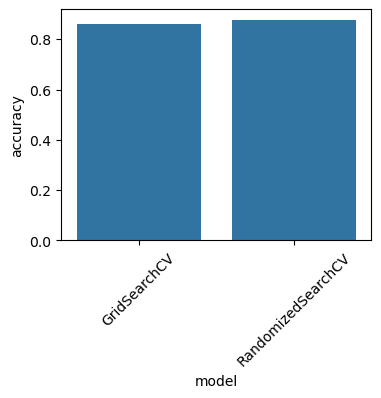

In [88]:
plt.figure(figsize = (4,3))
sns.barplot(models, x = "model", y = "accuracy")
plt.xticks(rotation = 45)